<a href="https://colab.research.google.com/github/ymkge/GenerativeAI_practice/blob/main/google_gemini_api_proctice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## インストール

In [4]:
!pip install -q -U google-generativeai

## ライブラリ読み込み

In [5]:
import pathlib
import textwrap
import google.generativeai as genai
from google.colab import userdata
from IPython.display import display
from IPython.display import Markdown
import getpass

In [6]:
# テキストをマークダウン形式に変換する関数
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [7]:
apikey = getpass.getpass(prompt = 'GeminiのAPIキーを入力してください') ## google AI studioからapikeyを取得して入力する
genai.configure(api_key=apikey)

GeminiのAPIキーを入力してください··········


## gemini-proで言語生成

In [ ]:
model = genai.GenerativeModel('gemini-pro')

In [ ]:
response = model.generate_content("2030年ごろ生成AIの機能はどのぐらいの業種で利用されるでしょうか？予測をなるべく正しく見積もって教えてください",
                                  generation_config=genai.types.GenerationConfig(
                                      candidate_count=1, # 現在は1個まで
                                      temperature=0.9
                                  ))
to_markdown(response.text)

> 2030年ごろ、生成AIの機能は幅広い業種で利用されると予想されています。主な業種は以下の通りです。
> 
> **メディア・エンターテインメント**
> * ニュース記事、ブログ記事、小説、脚本、映画のリクエストなど、コンテンツ制作
> * 音楽やオーディオの作成
> * ビデオやビジュアルの作成
> 
> **eコマースと小売**
> * 商品説明やマーケティング資料の作成
> * 顧客サービスの自動化
> * パーソナライズされたショッピングレコメンデーションの提供
> 
> **金融と保険**
> * 財務報告書やリスク分析の作成
> * ローン申し込みの処理
> * 保険契約の管理
> 
> **ヘルスケア**
> * 患者のカルテや治療計画の作成
> * 医学的研究の実施
> * 医薬品と治療法の開発
> 
> **製造とエンジニアリング**
> * 製品設計やプロトタイピング
> * 製造プロセスの自動化
> * サプライチェーン管理
> 
> **教育とトレーニング**
> * オンラインコースやその他の学習教材の作成
> * パーソナライズされた学習体験の提供
> * 評価や採点の自動化
> 
> **法律**
> *法的書類の作成
> * 法律研究の実施
> * 裁判手続きのサポート
> 
> **カスタマーサービス**
> * 顧客からの問い合わせへの対応
> * 問題の解決
> * 製品やサービスに関する情報の提供
> 
> **マーケティングと広告**
> * マーケティング資料の作成
> * ターゲット広告の配信
> * 消費者の行動分析
> 
> **不動産**
> * 物件リストの作成
> * 査定の提供
> * 売買取引のサポート
> 
> これは生成AIが利用される可能性のある業種のほんの一例です。生成AIの技術が発展し続けるにつれて、その利用範囲はさらに広がっていくことが予想されます。

In [12]:
# response.candidates

## gemini-pro-visionを使って画像から情報を取得

In [8]:
import PIL.Image

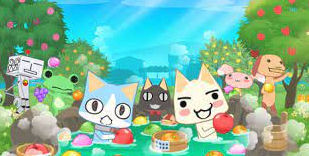

In [9]:
img = PIL.Image.open('dokodemoissho.png')
img

In [10]:
model = genai.GenerativeModel('gemini-pro-vision')

In [11]:
response = model.generate_content(["この画像の状況を正確に教えてください", img], stream=True)
response.resolve()
to_markdown(response.text)

>  画像には、猫、犬、カエル、ロボットが温泉に入っている様子が描かれています。猫は、白、黒、茶色の3匹がおり、それぞれが異なる表情をしています。犬は、ピンク色で、温泉の中でボールで遊んでいます。カエルは、緑色で、温泉の岩の上に座っています。ロボットは、灰色で、温泉の隣に立っています。温泉の周りには、緑の木々が生い茂っています。

## gemini-proでチャット（会話）を行う

In [13]:
model = genai.GenerativeModel('gemini-pro')

In [ ]:
# メッセージを返さないとエラーとなってSTOP
from IPython.display import HTML, display

def display_message(message, background_color="#000000"):
    display(HTML(f"<div style='background-color: {background_color}; padding: 10px;'>{message}</div>"))

chat = model.start_chat(history=[])
while True:
    user_message = input("You: ")
    response = chat.send_message(user_message)
    gemini_message = chat.history[-1].parts[0].text
    display_message(f'トロ@どこでもいっしょ: {gemini_message}', background_color="#006600")

You: こんにちわ！


You: いい感じです！あたなは？


You: あなたの性格を変更する方法を教えてください


KeyboardInterrupt: Interrupted by user

You: 


In [ ]:
## メッセージを未入力だとエラーにならないように修正
from IPython.display import HTML, display

def display_message(message, background_color="#000000"):
    display(HTML(f"<div style='background-color: {background_color}; padding: 10px;'>{message}</div>"))

chat = model.start_chat(history=[])
while True:
    user_message = input("You: ")
    if user_message is not None:
        response = chat.send_message(user_message)
        gemini_message = chat.history[-1].parts[0].text
        display_message(f'トロ@どこでもいっしょ: {gemini_message}', background_color="#006600")

You: こんにちわ！


You: 今日の横浜の天気と気温を教えてください


You: ハロー


You: 今日のご飯は何がいいかな？


KeyboardInterrupt: Interrupted by user

You: 
